In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Data Cleaning

In [216]:
get_details = lambda x: df.groupby(x).mean()['Potability']

<AxesSubplot:xlabel='Trihalomethanes'>

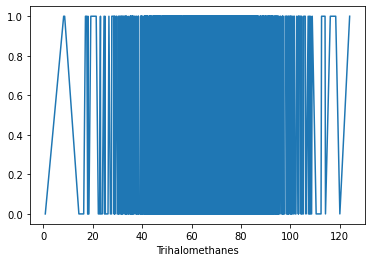

In [217]:
get_details('Trihalomethanes').plot()

In [218]:
missed_data = df.isnull().sum()

In [219]:
missed_data.sum()

1434

In [220]:
total_data = np.product(df.shape)
percentage = missed_data.sum()/total_data
percentage*100

4.377289377289377

In [221]:
subset_df = df.loc[: , :].head()
subset_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [222]:
df.fillna(method="bfill")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,356.886136,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,356.886136,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,69.845400,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<AxesSubplot:>

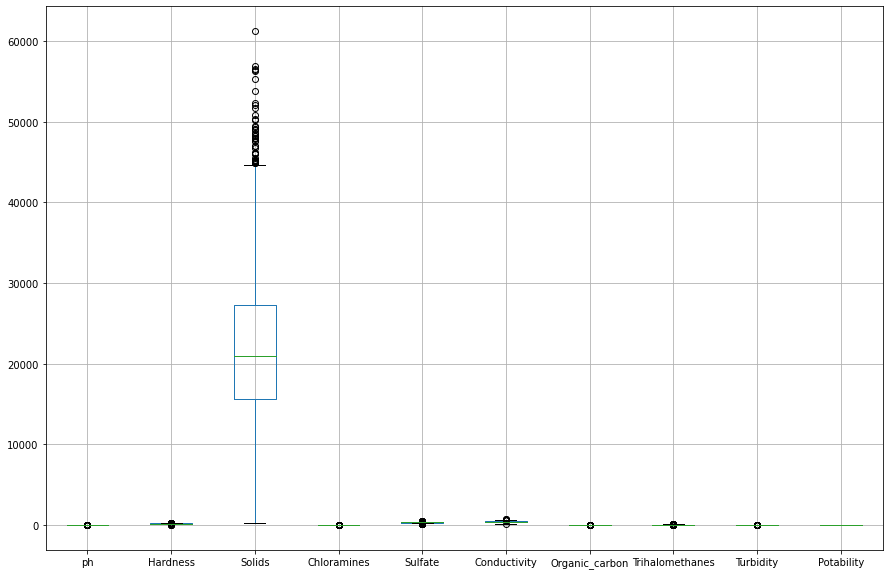

In [223]:
df.boxplot(figsize=(15,10))

In [226]:
df.loc[df.Potability == 2.04981388135992 ,'Potability'] = 1
df.to_csv("dataset.csv", index=False)

In [227]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [228]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [229]:
df.fillna(df.mean())

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


<AxesSubplot:>

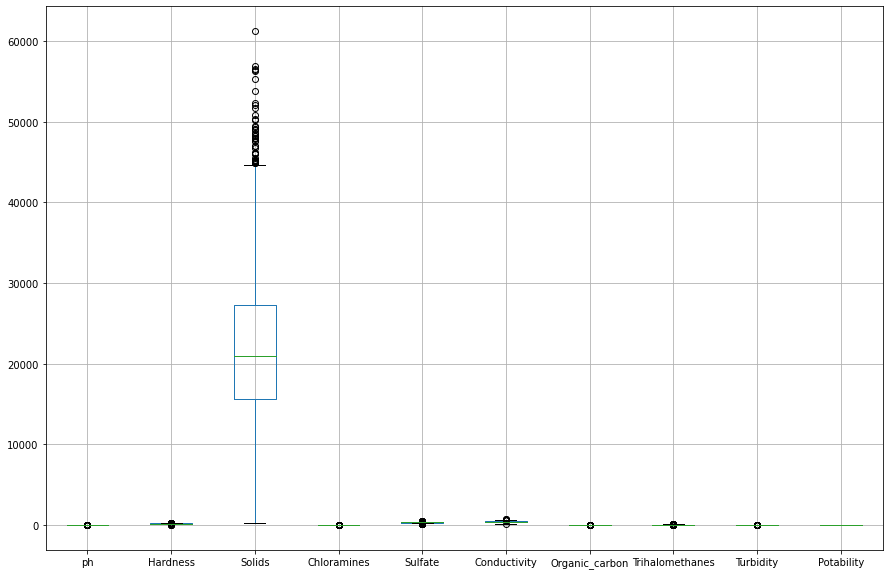

In [230]:
df.boxplot(figsize=(15,10))

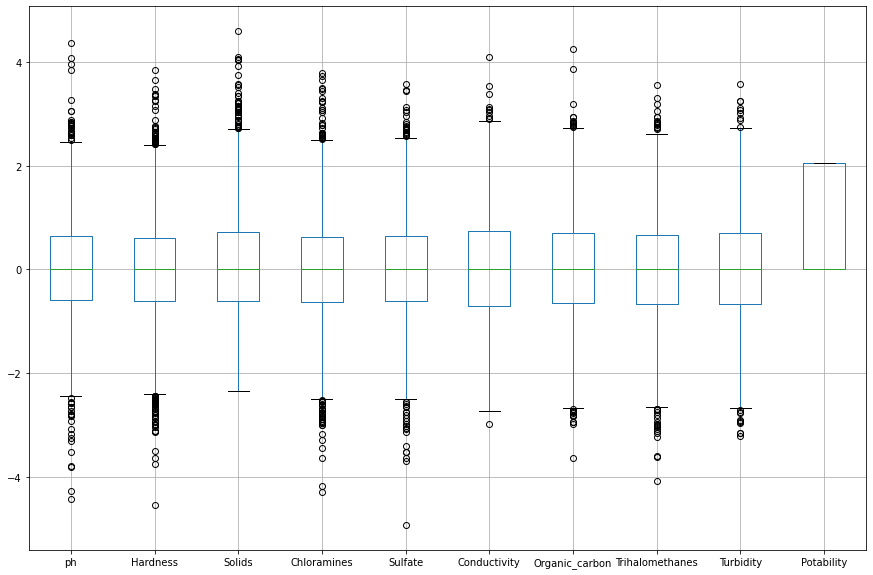

In [231]:
z = (df-df.median())/df.std()
z.boxplot(figsize=(15,10))
z = z.fillna(z.median())


## corrolation of our parameters

In [232]:
corr_dataset = z.corr()
corr_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


Text(0.5, 1.0, 'Cororlation Heat map')

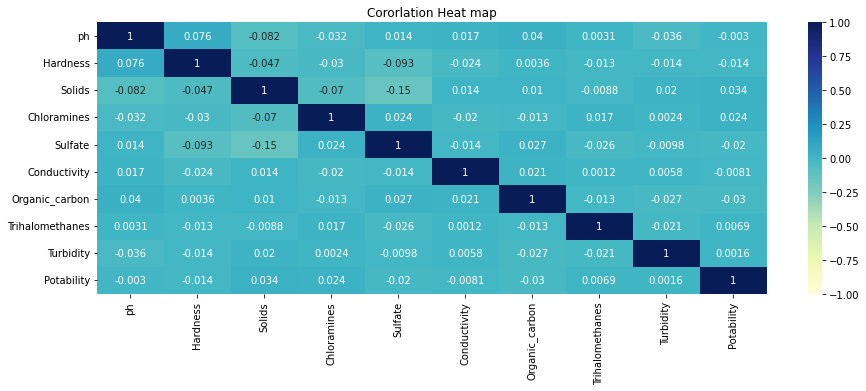

In [234]:
import seaborn as sns
better_heatmat = plt.figure(figsize=(15,5))
sns.heatmap(corr_dataset, vmin= -1 , vmax =1 , annot = True, cmap= "YlGnBu").set_title("Cororlation Heat map")

In [260]:
z.loc[z.Potability == 2.04981388135992, 'Potability'] =1
z.to_csv("dataset.csv",index=False)

# Building our models

In [404]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = {
    
    "SGD" : SGDClassifier(),
    'SGD_log' : SGDClassifier(loss='log'),
    'SGD_squared_hinge' : SGDClassifier(loss='squared_hinge',alpha=0.015),
    'SVC' : SVC(),
    'RandomForest': RandomForestClassifier(),
    "decision_tree" : DecisionTreeClassifier()
}


feature_cols = ['ph','Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
x = z[feature_cols]
y = z.Potability
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=1)



In [420]:
from sklearn.metrics import classification_report
import seaborn as sns


def test_models (model):
    model.fit(X_train,Y_train)
    pred = model.predict(X_test) 
#     print(classification_report(Y_test,pred))
    cnf_matrix = metrics.confusion_matrix(Y_test,pred)
    heat_map = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.show(heat_map)
    return metrics.accuracy_score(Y_test,pred)

### In this section we calculate the accuracy of our models. Also, for SVC model we chack the accuracy for different kernel

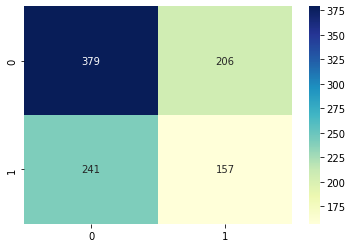

SGD: 0.545
------------------


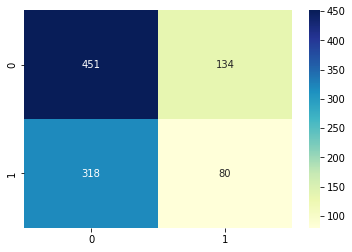

SGD_log: 0.540
------------------


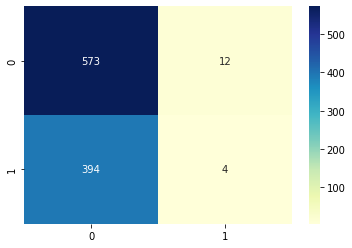

SGD_squared_hinge: 0.587
------------------


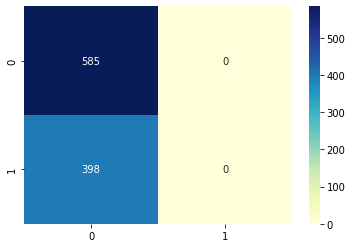

kernel Type: linear
SVC: 0.595
------------------


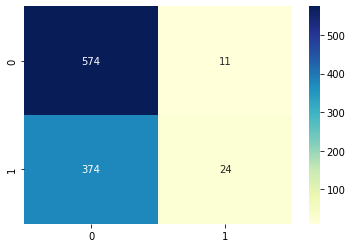

kernel Type: poly
SVC: 0.608
------------------


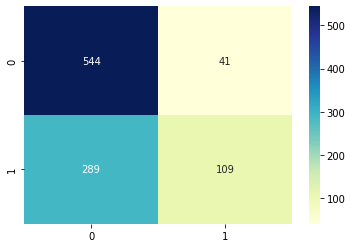

kernel Type: rbf
SVC: 0.664
------------------


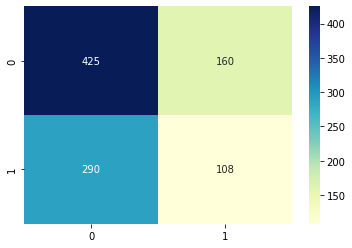

kernel Type: sigmoid
SVC: 0.542
------------------


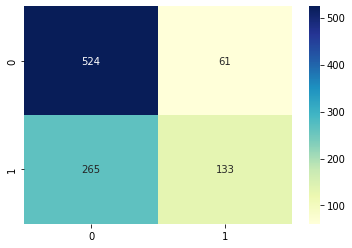

RandomForest: 0.668
------------------


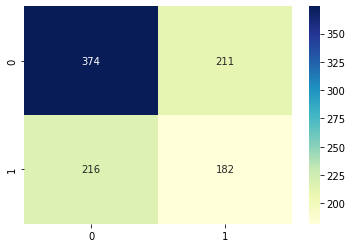

decision_tree: 0.566
------------------


In [424]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for model_name,i in models.items():
    if model_name == 'SVC':
        print("=======================")
        for j in kernel:
            accuracy= test_models(SVC(kernel=j))
            print("kernel Type: "+j)
            print(f'{model_name}: {accuracy:.3f}\n------------------')
        print("=======================")

    else:
        accuracy= test_models(i)
        print(f'{model_name}: {accuracy:.3f}\n------------------')
    
        
    

# KNN algorithms

              precision    recall  f1-score   support

         0.0       0.64      0.87      0.74       585
         1.0       0.61      0.29      0.39       398

    accuracy                           0.64       983
   macro avg       0.63      0.58      0.57       983
weighted avg       0.63      0.64      0.60       983

[[511  74]
 [282 116]]


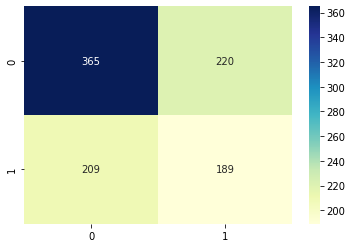

In [407]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

feature_cols = ['ph','Hardness', 'Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
x = z[feature_cols]
y = z.Potability
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=1)


scaler = StandardScaler()
scaler.fit(X_test)

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,Y_train)

Y_predict = classifier.predict(X_test)


print(classification_report(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))
cnf_matrix_3 = metrics.confusion_matrix(y_test, y_pred) 
heat_map = sns.heatmap(pd.DataFrame(cnf_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show(heat_map)